# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from numpy import linalg as LA
from matplotlib import pyplot as plt
from scipy import linalg

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [4]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

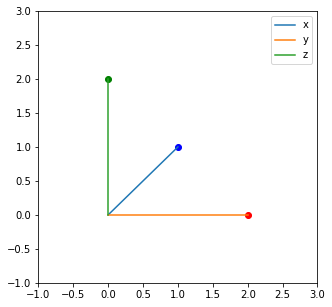

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])

ax.plot([0,x[0]], [0,x[1]])
ax.plot([0,y[0]], [0,y[1]])
ax.plot([0,z[0]], [0,z[1]])

ax.scatter(x[0], x[1], c='b', marker='o')
ax.scatter(y[0], y[1], c='r', marker='o')
ax.scatter(z[0], z[1], c='g', marker='o')

plt.legend(['x', 'y', 'z'])
plt.show()

In [6]:
xLength = np.linalg.norm( x )
yLength = np.linalg.norm( y )
zLength = np.linalg.norm( z )

In [7]:
# cos угла между векторами x, y
np.dot( x, y ) / ( xLength * yLength )

0.7071067811865475

In [8]:
# cos угла между векторами x, z
np.dot( x, z ) / ( xLength * zLength )

0.7071067811865475

## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

  type         x         y         z
0    v  0.000889  0.119490  0.010071
1    v  0.098418 -0.053715 -0.021635
2    v  0.098418 -0.053715 -0.021635
3    v  0.093672 -0.398935 -0.008132
4    v  0.094885 -0.758728 -0.036067


Text(0.5, 1.0, 'Модель человека')

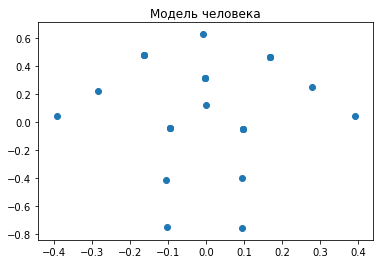

In [14]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])
print(dfJointsVertexes.head())
plt.scatter(df.x, df.y)
plt.title('Модель человека')

Text(0.5, 1.0, 'Модель человека')

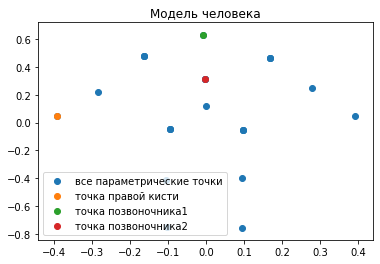

In [15]:
plt.scatter(df.x, df.y)
plt.scatter(df.x[21], df.y[21])
plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[9], df.y[9])
plt.legend(['все параметрические точки', 'точка правой кисти', 'точка позвоночника1', 'точка позвоночника2'])
plt.title('Модель человека')

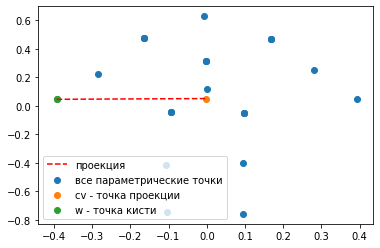

In [49]:
# вектор v - вектор позвоночника (составлен как разность одного вектора из другого)
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
# вектор w - вектор кисти
w = np.array([df.x[21],df.y[21]])

# строим проекцию данной точки w на вектор v: cv
cv = np.array(df.x[9], df.y[9]) + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

# линия между v и cv
plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', 'все параметрические точки', 'cv - точка проекции', 'w - точка кисти'])

In [51]:
# Расстояние от кисти до позвоночника
linalg.norm(cv - w)

0.38940416891982127

# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [3]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [6]:

e_vals, e_vecs = LA.eig(m1)
print('Исходная матрица: \n', m1)

print('Собственные векторы: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[2 2]
 [1 3]]
Собственные векторы: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения:  [1. 4.]


In [8]:
#  характеристическое уравнение λ^2 - 5λ +3
np.roots([1, -5, 3])
# корни характеристического уравнения, они же собственные значения

array([4.30277564, 0.69722436])

In [7]:
e_vals, e_vecs = LA.eig(m2)
print('Исходная матрица: \n', m2)

print('Собственные векторы: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственные векторы: 
 [[-0.57735027 -0.81649658  0.15430335]
 [-0.57735027  0.40824829  0.6172134 ]
 [ 0.57735027 -0.40824829  0.77151675]]
Собственные значения:  [6. 3. 3.]


In [9]:
#  характеристическое уравнение -λ^3 + 12λ^2 - 47λ +74
np.roots([-1, 12, -47, 74])
# корни характеристического уравнения, они же собственные значения

array([6.54830355+0.j        , 2.72584822+1.96733023j,
       2.72584822-1.96733023j])

In [ ]:
Не поняла, форму записи полученных значений.. это какое-то большое количество знаков после запятой?